In [1]:
from pymongo import MongoClient
from bson.son import SON
from textblob import TextBlob
from dateutil import parser
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

client = MongoClient("52.25.140.201",27017)
db = client['ProjectCorruption']
coll_parsed = db['Parsed_Articles']

In [2]:
from_year = '01/01/2014'
to_year = '12/31/2014'
from_year_d = parser.parse(from_year)
to_year_d = parser.parse(to_year)

In [3]:
from bson.son import SON

print from_year_d
print to_year_d
print type(from_year_d)
print type(to_year_d)

pipeline = [{"$unwind": "$names"},
            {"$match": {"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}},\
            {"$group": {"_id": {"source":"$source", "name":"$names",},\
                                "totkeywords": {"$sum": "$tot_keywords"}}}]


output_list2 = coll_parsed.aggregate(pipeline)

print output_list
# output_list = coll_parsed.find({})

#for each in output_list.result:
#    print each['source']+"-"+each['name']+str(each['totkeywords'])

2014-01-01 00:00:00
2014-12-31 00:00:00
<type 'datetime.datetime'>
<type 'datetime.datetime'>


NameError: name 'output_list' is not defined

In [4]:
from bson.son import SON

print from_year_d
print to_year_d
print type(from_year_d)
print type(to_year_d)

pipeline = [{"$unwind": "$names"},
            {"$match": {"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}},\
            {"$group": {"_id": {"source":"$source", "name":"$names", "month": {"$month": "$date"}},\
                                "totkeywords": {"$sum": "$tot_keywords"}}}]


output_list = coll_parsed.aggregate(pipeline)

print output_list
# output_list = coll_parsed.find({})

#for each in output_list.result:
#    print each['source']+"-"+each['name']+str(each['totkeywords'])

2014-01-01 00:00:00
2014-12-31 00:00:00
<type 'datetime.datetime'>
<type 'datetime.datetime'>
{u'ok': 1.0, u'result': [{u'totkeywords': 0, u'_id': {u'source': u'LaNacion', u'name': u'Grondona', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Vandenbroele', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'FIFA', u'month': 8}}, {u'totkeywords': 0, u'_id': {u'source': u'Clarin', u'name': u'Oyarbide', u'month': 2}}, {u'totkeywords': 0, u'_id': {u'source': u'Clarin', u'name': u'Pontaquarto', u'month': 1}}, {u'totkeywords': 6, u'_id': {u'source': u'LaNacion', u'name': u'Pontaquarto', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'Oyarbide', u'month': 1}}, {u'totkeywords': 1, u'_id': {u'source': u'Ambito', u'name': u'Boudou', u'month': 12}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'enador', u'month': 3}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'Menem', u'month': 

In [5]:

print coll_parsed.find({"date": {"$gte":from_year_d}, "date": {"$lte":to_year_d}}).count()


8402


In [6]:
a = output_list['result']
print a

[{u'totkeywords': 0, u'_id': {u'source': u'LaNacion', u'name': u'Grondona', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'Vandenbroele', u'month': 9}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'FIFA', u'month': 8}}, {u'totkeywords': 0, u'_id': {u'source': u'Clarin', u'name': u'Oyarbide', u'month': 2}}, {u'totkeywords': 0, u'_id': {u'source': u'Clarin', u'name': u'Pontaquarto', u'month': 1}}, {u'totkeywords': 6, u'_id': {u'source': u'LaNacion', u'name': u'Pontaquarto', u'month': 5}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'Oyarbide', u'month': 1}}, {u'totkeywords': 1, u'_id': {u'source': u'Ambito', u'name': u'Boudou', u'month': 12}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'enador', u'month': 3}}, {u'totkeywords': 0, u'_id': {u'source': u'Ambito', u'name': u'Menem', u'month': 3}}, {u'totkeywords': 0, u'_id': {u'source': u'Infobae', u'name': u'FIFA', u'month': 9}}, {u'totkeywords': 0, u'_id': 

In [7]:
b = pd.DataFrame(a)

In [8]:
print b.head()

                                                 _id  totkeywords
0  {u'source': u'LaNacion', u'name': u'Grondona',...            0
1  {u'source': u'Infobae', u'name': u'Vandenbroel...            0
2  {u'source': u'Infobae', u'name': u'FIFA', u'mo...            0
3  {u'source': u'Clarin', u'name': u'Oyarbide', u...            0
4  {u'source': u'Clarin', u'name': u'Pontaquarto'...            0


In [9]:
print b['_id'][0]['source']

LaNacion


In [10]:
for each in range(len(b)):
    print b['_id'][each]['source']+"-"+b['_id'][each]['name']+" - "+str(b['totkeywords'][each])+\
    " Month: "+str(b['_id'][each]['month'])

LaNacion-Grondona - 0 Month: 5
Infobae-Vandenbroele - 0 Month: 9
Infobae-FIFA - 0 Month: 8
Clarin-Oyarbide - 0 Month: 2
Clarin-Pontaquarto - 0 Month: 1
LaNacion-Pontaquarto - 6 Month: 5
Ambito-Oyarbide - 0 Month: 1
Ambito-Boudou - 1 Month: 12
Ambito-enador - 0 Month: 3
Ambito-Menem - 0 Month: 3
Infobae-FIFA - 0 Month: 9
Infobae-Vandenbroele - 0 Month: 3
Pagina12-Blatter - 0 Month: 9
Pagina12-AFA - 0 Month: 10
TA-Boudou - 4 Month: 8
LaNacion-Blatter - 1 Month: 10
LaNacion-Havelange - 1 Month: 10
Infobae-Macri - 1 Month: 5
TA-Vido - 0 Month: 11
TA-Menem - 0 Month: 10
TA-Menem - 0 Month: 11
TA-Venezuela - 2 Month: 5
TA-Lijo - 0 Month: 8
TA-Vandenbroele - 0 Month: 11
TA-Boudou - 0 Month: 11
TA-Lijo - 0 Month: 3
TA-Boudou - 2 Month: 6
TA-Maduro - 1 Month: 7
TA-Menem - 1 Month: 12
TA-Kirchner - 0 Month: 12
TA-Oyarbide - 5 Month: 5
TA-Lijo - 3 Month: 12
TA-Kirchner - 4 Month: 7
TA-Oyarbide - 0 Month: 8
TA-FIFA - 2 Month: 1
TA-Baez - 0 Month: 10
TA-Dilma - 12 Month: 12
TA-iputad - 4 Month: 4
T

In [11]:
aggreg_list = []

print b['_id'][0]['source']
for each in range(len(b)):
    source = b['_id'][each]['source']
    name = b['_id'][each]['name']
    month = b['_id'][each]['month']
    totkey = b['totkeywords'][each]
    aggreg_list.append([source,name,month,totkey])

df_columns = ['source','name','month','total']
df_aggreg = pd.DataFrame(aggreg_list,columns=df_columns)


LaNacion


In [13]:
print df_aggreg.tail()

        source       name  month  total
1144  LaNacion  Havelange     11      1
1145  Pagina12        AFA     11      3
1146  LaNacion   Oyarbide      4     24
1147  Pagina12      Macri      1     13
1148  LaNacion     enador      6     44


In [14]:
df_sorted = df_aggreg.sort('month')

In [15]:
print df_sorted

        source          name  month  total
259     Ambito      Kirchner      1      3
401   Pagina12        Maduro      1      6
959   Pagina12          Leoz      1      2
404   Pagina12      Kirchner      1     13
965         TA        enador      1      2
168    Infobae        Maduro      1      1
165    Infobae        Boudou      1      1
164    Infobae          Lijo      1      1
406   Pagina12          FIFA      1      2
407   Pagina12       Blatter      1      2
302    Infobae     Venezuela      1      4
410     Clarin       Blatter      1      1
986   LaNacion      Grondona      1      5
987   LaNacion      Oyarbide      1      4
135    Infobae      Kirchner      1      2
130    Infobae      Grondona      1      3
129    Infobae       Blatter      1      5
128    Infobae          FIFA      1      5
1058    Clarin          FIFA      1      1
602     Clarin     Venezuela      1      9
604     Perfil          Vido      1      1
1051  LaNacion          FIFA      1      4
1045    Cla

In [16]:
person = df_sorted['name'].unique()
source = df_sorted['source'].unique()
print source
print person

[u'Ambito' u'Pagina12' u'TA' u'Infobae' u'Clarin' u'LaNacion' u'Perfil']
[u'Kirchner' u'Maduro' u'Leoz' u'enador' u'Boudou' u'Lijo' u'FIFA'
 u'Blatter' u'Venezuela' u'Grondona' u'Oyarbide' u'Vido' u'Menem' u'iputad'
 u'AFA' u'Lula' u'Havelange' u'Dilma' u'Macri' u'Vandenbroele'
 u'Pontaquarto' u'Maximo' u'Clarin' u'Baez' u'Anibal']


In [17]:
print df_sorted['name'].unique()

[u'Kirchner' u'Maduro' u'Leoz' u'enador' u'Boudou' u'Lijo' u'FIFA'
 u'Blatter' u'Venezuela' u'Grondona' u'Oyarbide' u'Vido' u'Menem' u'iputad'
 u'AFA' u'Lula' u'Havelange' u'Dilma' u'Macri' u'Vandenbroele'
 u'Pontaquarto' u'Maximo' u'Clarin' u'Baez' u'Anibal']


In [18]:
import seaborn as sns
import pylab as P

hmp_name = df_sorted['name']
hmp_source = df_sorted['source']
hmp_total = df_sorted['total']

frames = [hmp_name, hmp_source, hmp_total]

to_graph = pd.concat(frames, axis = 1)

In [19]:
print to_graph

              name    source  total
259       Kirchner    Ambito      3
401         Maduro  Pagina12      6
959           Leoz  Pagina12      2
404       Kirchner  Pagina12     13
965         enador        TA      2
168         Maduro   Infobae      1
165         Boudou   Infobae      1
164           Lijo   Infobae      1
406           FIFA  Pagina12      2
407        Blatter  Pagina12      2
302      Venezuela   Infobae      4
410        Blatter    Clarin      1
986       Grondona  LaNacion      5
987       Oyarbide  LaNacion      4
135       Kirchner   Infobae      2
130       Grondona   Infobae      3
129        Blatter   Infobae      5
128           FIFA   Infobae      5
1058          FIFA    Clarin      1
602      Venezuela    Clarin      9
604           Vido    Perfil      1
1051          FIFA  LaNacion      4
1045         Menem    Clarin      4
1024        iputad    Ambito      2
954            AFA   Infobae      3
621            AFA  Pagina12      6
1014        iputad    Clarin

In [20]:
person = to_graph['name'].unique()
source = to_graph['source'].unique()

print person
print source

[u'Kirchner' u'Maduro' u'Leoz' u'enador' u'Boudou' u'Lijo' u'FIFA'
 u'Blatter' u'Venezuela' u'Grondona' u'Oyarbide' u'Vido' u'Menem' u'iputad'
 u'AFA' u'Lula' u'Havelange' u'Dilma' u'Macri' u'Vandenbroele'
 u'Pontaquarto' u'Maximo' u'Clarin' u'Baez' u'Anibal']
[u'Ambito' u'Pagina12' u'TA' u'Infobae' u'Clarin' u'LaNacion' u'Perfil']


In [21]:
scores = pd.DataFrame(0,columns=person, index=source)

print scores

          Kirchner  Maduro  Leoz  enador  Boudou  Lijo  FIFA  Blatter  \
Ambito           0       0     0       0       0     0     0        0   
Pagina12         0       0     0       0       0     0     0        0   
TA               0       0     0       0       0     0     0        0   
Infobae          0       0     0       0       0     0     0        0   
Clarin           0       0     0       0       0     0     0        0   
LaNacion         0       0     0       0       0     0     0        0   
Perfil           0       0     0       0       0     0     0        0   

          Venezuela  Grondona   ...    Lula  Havelange  Dilma  Macri  \
Ambito            0         0   ...       0          0      0      0   
Pagina12          0         0   ...       0          0      0      0   
TA                0         0   ...       0          0      0      0   
Infobae           0         0   ...       0          0      0      0   
Clarin            0         0   ...       0          0 

In [22]:
for index in range(len(to_graph)):
    nm = to_graph['name'][index]
    sr = to_graph['source'][index]
    scores[str(nm)][str(sr)] = to_graph['total'][index]

In [23]:
print scores

          Kirchner  Maduro  Leoz  enador  Boudou  Lijo  FIFA  Blatter  \
Ambito           0       0     1       4       0     1     0        1   
Pagina12        31       4     2      17      20    14     6        0   
TA               3       1     0       0       1     3     2        0   
Infobae          4      15     2       6      14     0     9        5   
Clarin           0       2     2      19       0    19     2        2   
LaNacion        62       2     7      44      12    15     5       18   
Perfil          21       1     0      14      11    10     2        0   

          Venezuela  Grondona   ...    Lula  Havelange  Dilma  Macri  \
Ambito            1         1   ...       8          0      8      2   
Pagina12         11         2   ...      33          6     10     13   
TA                2         1   ...       6          0      2      7   
Infobae          29         3   ...       3          2      0      1   
Clarin            8         1   ...       5          0 

In [24]:
venezuela = scores[5:6]
print venezuela


          Kirchner  Maduro  Leoz  enador  Boudou  Lijo  FIFA  Blatter  \
LaNacion        62       2     7      44      12    15     5       18   

          Venezuela  Grondona   ...    Lula  Havelange  Dilma  Macri  \
LaNacion         17         7   ...      16          1      6      5   

          Vandenbroele  Pontaquarto  Maximo  Clarin  Baez  Anibal  
LaNacion             4            4       0       3     1       1  

[1 rows x 25 columns]


In [ ]:
blatter = scores[0:1]
print blatter

In [ ]:
scores.head()

In [ ]:
test = scores[0:2]
print test

In [ ]:
corr = test.corr('pearson')

print corr

In [26]:
corr2 = scores.corr('pearson')
print corr2

              Kirchner    Maduro      Leoz    enador    Boudou      Lijo  \
Kirchner      1.000000 -0.139660  0.796870  0.876983  0.591542  0.489703   
Maduro       -0.139660  1.000000  0.080917 -0.160838  0.478569 -0.358557   
Leoz          0.796870  0.080917  1.000000  0.898082  0.316123  0.444575   
enador        0.876983 -0.160838  0.898082  1.000000  0.348409  0.724869   
Boudou        0.591542  0.478569  0.316123  0.348409  1.000000  0.163941   
Lijo          0.489703 -0.358557  0.444575  0.724869  0.163941  1.000000   
FIFA          0.305569  0.873130  0.384721  0.204786  0.774115 -0.051922   
Blatter       0.758897  0.108525  0.951310  0.829349  0.225213  0.264953   
Venezuela     0.247776  0.890882  0.521773  0.282115  0.561632 -0.069183   
Grondona      0.872997  0.168579  0.912151  0.838261  0.468245  0.260864   
Oyarbide      0.855803  0.125123  0.980439  0.902502  0.416730  0.445631   
Vido          0.782897  0.106907  0.925888  0.824005  0.255015  0.292981   
Menem       

([<matplotlib.axis.YTick at 0x11161cbd0>,
 <a list of 25 Text yticklabel objects>)

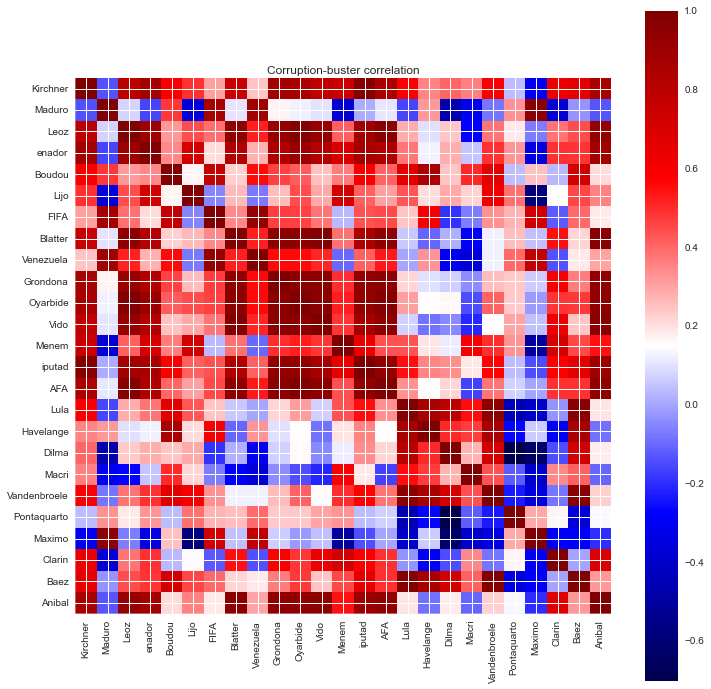

In [36]:
plt.figure(figsize=(12,12))
plt.imshow(corr2,cmap='seismic',interpolation='none')
plt.colorbar()
plt.title("Corruption-buster correlation")
plt.xticks(range(len(corr2)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2)), corr2.columns)

([<matplotlib.axis.YTick at 0x11018e0d0>,
 <a list of 25 Text yticklabel objects>)

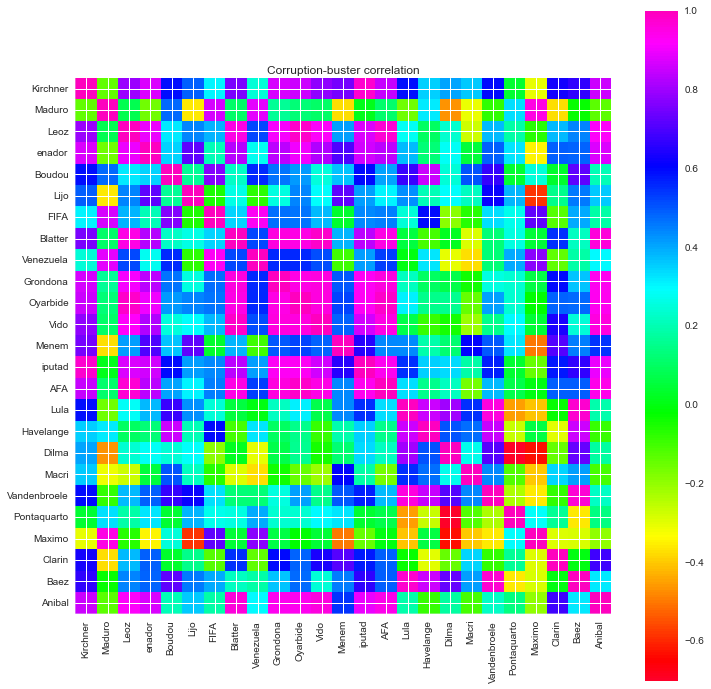

In [35]:
plt.figure(figsize=(12,12))
plt.imshow(corr2,cmap='gist_rainbow',interpolation='none')
plt.colorbar()
plt.title("Corruption-buster correlation")
plt.xticks(range(len(corr2)), corr2.columns, rotation=90)
plt.yticks(range(len(corr2)), corr2.columns)